# Thư viện

In [ ]:
!pip install pyvi
!pip install pandas
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 35.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string

from underthesea import sent_tokenize
from pyvi import ViTokenizer

In [ ]:
import matplotlib.pyplot as plt
import os

# Raw data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/Data/raw data.csv')

In [ ]:
df.head()

,Comment,Label
0,"Trường rất xịn xò, view cũng quá okela, thầy c...",1
1,"Thầy cô vui tính, dễ thương lắm nha, ngoài ra ...",1
2,"Trường có không gian xanh, mát mẻ. Thầy cô dễ ...",1
3,Điểm mạnh nhất của TDMU là đội ngũ giảng viên ...,1
4,"Thầy cô nhiệt tình, chất lượng đào tạo tốt, si...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comment   1000 non-null   object
 1   Label     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# EDA

In [ ]:
df_1 = pd.DataFrame()

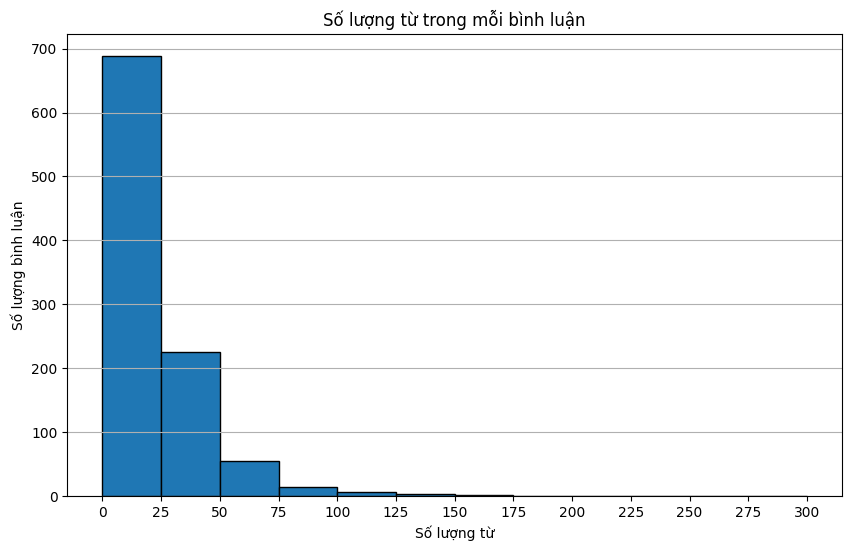

In [ ]:
# Đếm số từ
df_1['word_count'] = df['Comment '].str.split().apply(len)

# chia thành các khoảng gồm 25 từ
bins = list(range(0, 301, 25))

plt.figure(figsize=(10, 6))
plt.hist(df_1['word_count'], bins = bins, edgecolor='black')
plt.xlabel('Số lượng từ')
plt.ylabel('Số lượng bình luận')
plt.title('Số lượng từ trong mỗi bình luận')
plt.xticks(range(0, 301, 25))
plt.grid(axis='y')
plt.show()

In [ ]:
# Số lượng từ ở mỗi bình luận
df_1['word_count_df'] = pd.cut(df_1['word_count'], bins=bins)
df_1['word_count_df'].value_counts()

,count
word_count_df,
"(0, 25]",705
"(25, 50]",212
"(50, 75]",53
"(75, 100]",15
"(100, 125]",5
"(125, 150]",3
"(150, 175]",2
"(175, 200]",1
"(200, 225]",1


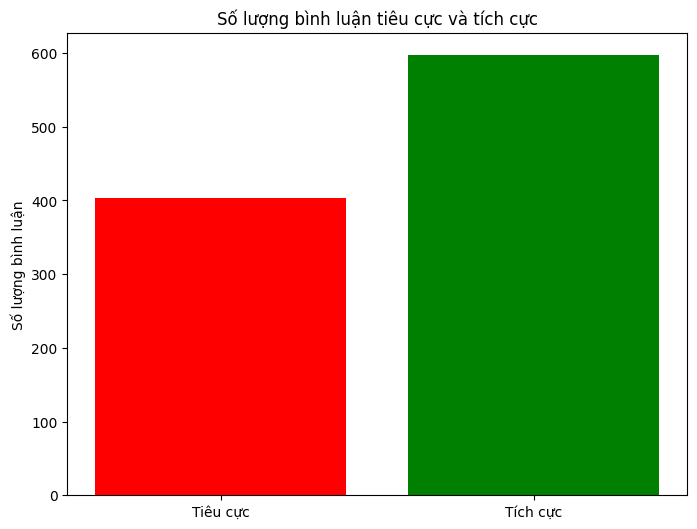

In [ ]:
negative_comments = len(df[df['Label'] == 0])
positive_comments = len(df[df['Label'] == 1])

plt.figure(figsize=(8, 6))
plt.bar(['Tiêu cực', 'Tích cực'], [negative_comments, positive_comments], color=['red', 'green'])
plt.ylabel("Số lượng bình luận")
plt.title("Số lượng bình luận tiêu cực và tích cực")
plt.show()

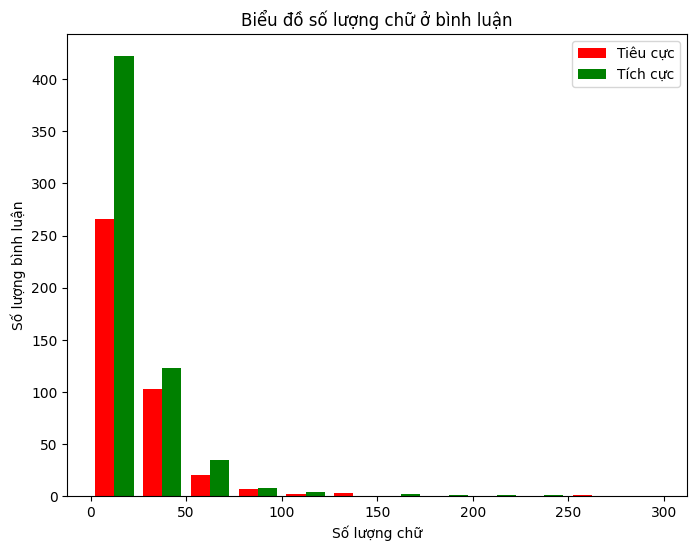

In [ ]:
# Count the number of characters in comments for each label
neg_cmt = df[df['Label'] == 0]['Comment '].str.split().apply(len)
pos_cmt = df[df['Label'] == 1]['Comment '].str.split().apply(len)

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.hist([neg_cmt, pos_cmt], bins = bins, label=['Tiêu cực', 'Tích cực'], color=['red', 'green'])
plt.xlabel("Số lượng chữ")
plt.ylabel("Số lượng bình luận")
plt.title("Biểu đồ số lượng chữ ở bình luận")
plt.legend()
plt.show()

# Kiểm tra giá trị trùng lặp

In [ ]:
df.duplicated().sum()

16

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comment   984 non-null    object
 1   Label     984 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 23.1+ KB


# Xử lí khoảng trắng, ký tự đặc biệt, emoji và đưa về chữ thường

In [ ]:
def remove_punctuation(text):
    return "".join([i for i in text if i not in string.punctuation])

def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F700-\U0001F77F"  # Alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters
        u"\U0001F1E6-\U0001F1FF"  # Regional Indicator Symbols (flags)
        u"\U0001F3FB-\U0001F3FF"  # Emoji modifiers (skin tones)
        u"\uFE0F"                 # Variation Selector
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_extra_spaces(text):
    # Strip leading/trailing spaces and replace multiple spaces with a single space
    return ' '.join(text.split())

def preprocess(text):
    text = remove_punctuation(text)
    text = remove_emoji(text)
    text = remove_extra_spaces(text)  # Remove unnecessary spaces
    text = text.lower()
    return text

In [ ]:
df['1_Comment'] = df['Comment '].apply(preprocess)
df

,Comment,Label,1_Comment
0,"Trường rất xịn xò, view cũng quá okela, thầy c...",1,trường rất xịn xò view cũng quá okela thầy cô ...
1,"Thầy cô vui tính, dễ thương lắm nha, ngoài ra ...",1,thầy cô vui tính dễ thương lắm nha ngoài ra cò...
2,"Trường có không gian xanh, mát mẻ. Thầy cô dễ ...",1,trường có không gian xanh mát mẻ thầy cô dễ th...
3,Điểm mạnh nhất của TDMU là đội ngũ giảng viên ...,1,điểm mạnh nhất của tdmu là đội ngũ giảng viên ...
4,"Thầy cô nhiệt tình, chất lượng đào tạo tốt, si...",1,thầy cô nhiệt tình chất lượng đào tạo tốt sinh...
...,...,...,...
995,Học từ lúc đại học thầy cô cũ còn tâm huyết. Q...,0,học từ lúc đại học thầy cô cũ còn tâm huyết qu...
996,"Trường h chỉ còn cái tiếng, là trung tâm kiếm ...",0,trường h chỉ còn cái tiếng là trung tâm kiếm t...
997,"Tốt. Thầy cô tốt, tâm huyết. Đào tạo và điều t...",1,tốt thầy cô tốt tâm huyết đào tạo và điều trị ...
998,"Trường khang trang, rộng rãi, nhiều bộ môn hơn...",1,trường khang trang rộng rãi nhiều bộ môn hơn x...


# Xử lí stopwords

In [ ]:
reference_stwrds = ('/content/drive/MyDrive/NLP/Data/vietnamese-stopwords.txt')
with open(reference_stwrds, 'r', encoding='utf-8') as file:
    vn_stopwords = file.readline()

In [ ]:
df['2_Comment'] = df['1_Comment'].apply(lambda x: ' '
                      .join([word for word in x.split() if word.lower() not in vn_stopwords]))
df

,Comment,Label,1_Comment,2_Comment
0,"Trường rất xịn xò, view cũng quá okela, thầy c...",1,trường rất xịn xò view cũng quá okela thầy cô ...,trường rất xịn xò view cũng quá okela thầy cô ...
1,"Thầy cô vui tính, dễ thương lắm nha, ngoài ra ...",1,thầy cô vui tính dễ thương lắm nha ngoài ra cò...,thầy cô vui tính dễ thương lắm nha ngoài ra cò...
2,"Trường có không gian xanh, mát mẻ. Thầy cô dễ ...",1,trường có không gian xanh mát mẻ thầy cô dễ th...,trường có không gian xanh mát mẻ thầy cô dễ th...
3,Điểm mạnh nhất của TDMU là đội ngũ giảng viên ...,1,điểm mạnh nhất của tdmu là đội ngũ giảng viên ...,điểm mạnh nhất của tdmu là đội ngũ giảng viên ...
4,"Thầy cô nhiệt tình, chất lượng đào tạo tốt, si...",1,thầy cô nhiệt tình chất lượng đào tạo tốt sinh...,thầy cô nhiệt tình chất lượng đào tạo tốt sinh...
...,...,...,...,...
995,Học từ lúc đại học thầy cô cũ còn tâm huyết. Q...,0,học từ lúc đại học thầy cô cũ còn tâm huyết qu...,học từ lúc đại học thầy cô cũ còn tâm huyết qu...
996,"Trường h chỉ còn cái tiếng, là trung tâm kiếm ...",0,trường h chỉ còn cái tiếng là trung tâm kiếm t...,trường h chỉ còn cái tiếng là trung tâm kiếm t...
997,"Tốt. Thầy cô tốt, tâm huyết. Đào tạo và điều t...",1,tốt thầy cô tốt tâm huyết đào tạo và điều trị ...,tốt thầy cô tốt tâm huyết đào tạo và điều trị ...
998,"Trường khang trang, rộng rãi, nhiều bộ môn hơn...",1,trường khang trang rộng rãi nhiều bộ môn hơn x...,trường khang trang rộng rãi nhiều bộ môn hơn x...


# Word Tokenize

In [ ]:
keep_together = ["xịn xò", "vẻ bề ngoài", "thầy cô", "làm tiền", "làm mình làm mẩy"]

all_tokens = []

for i in range(len(df)):
    text = str(df.iloc[i, 3]).lower()
    for phrase in keep_together:
        text = re.sub(r'\b' + phrase + r'\b', phrase.replace(" ", "_"), text)

    tokens = ViTokenizer.tokenize(text).split()
    all_tokens.append(tokens)

df["tokens"] = all_tokens

In [ ]:
df['tokens']

,tokens
0,"[trường, rất, xịn_xò, view, cũng, quá, okela, ..."
1,"[thầy_cô, vui_tính, dễ_thương, lắm, nha, ngoài..."
2,"[trường, có, không_gian, xanh, mát_mẻ, thầy_cô..."
3,"[điểm, mạnh, nhất, của, tdmu, là, đội_ngũ, giả..."
4,"[thầy_cô, nhiệt_tình, chất_lượng, đào_tạo, tốt..."
...,...
995,"[học, từ, lúc, đại_học, thầy_cô, cũ, còn, tâm_..."
996,"[trường, h, chỉ_còn, cái, tiếng, là, trung_tâm..."
997,"[tốt, thầy_cô, tốt, tâm_huyết, đào_tạo, và, đi..."
998,"[trường, khang_trang, rộng_rãi, nhiều, bộ_môn,..."


In [ ]:
df["sent_tokens"] = df["tokens"].apply(lambda x: " ".join(x)).astype(str)
print(df["sent_tokens"])

0      trường rất xịn_xò view cũng quá okela thầy_cô ...
1      thầy_cô vui_tính dễ_thương lắm nha ngoài_ra cò...
2      trường có không_gian xanh mát_mẻ thầy_cô dễ_th...
3      điểm mạnh nhất của tdmu là đội_ngũ giảng_viên ...
4      thầy_cô nhiệt_tình chất_lượng đào_tạo tốt sinh...
                             ...                        
995    học từ lúc đại_học thầy_cô cũ còn tâm_huyết qu...
996    trường h chỉ_còn cái tiếng là trung_tâm kiếm t...
997    tốt thầy_cô tốt tâm_huyết đào_tạo và điều_trị ...
998    trường khang_trang rộng_rãi nhiều bộ_môn hơn x...
999    trường đào_tạo bác_sĩ cử_nhân ngành y hàng_đầu...
Name: sent_tokens, Length: 984, dtype: object


# Xuất file processed data

In [ ]:
# output_dir = '/content/drive/MyDrive/NLP/Data'
# output_filename = 'processed_data.csv'
# output_path = os.path.join(output_dir, output_filename)

# df.to_csv(output_path, index=False, sep=',', encoding='utf-8')

# print(f"Dữ liệu được lưu ở: {output_path}")

# WordCloud

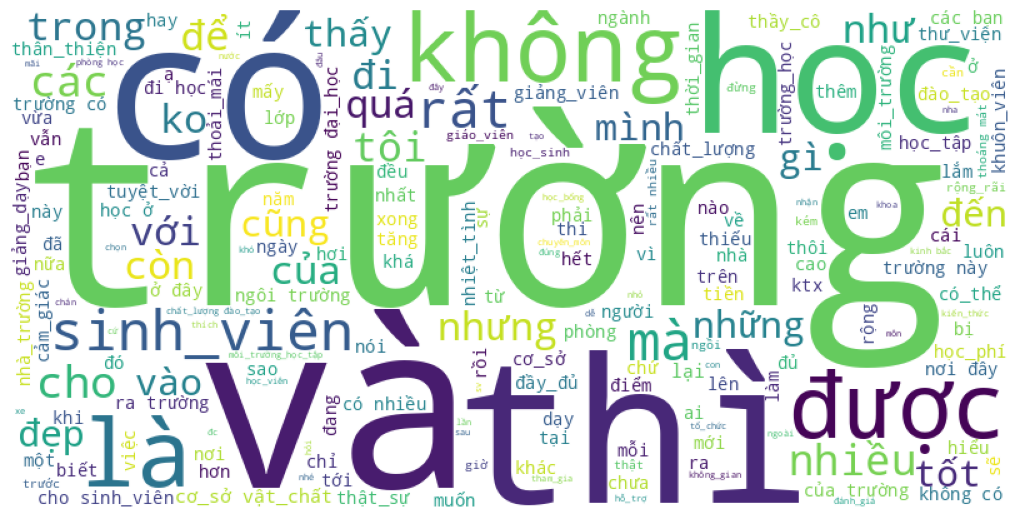

In [ ]:
from wordcloud import WordCloud

text = " ".join(vietnamese_tokens_list)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df_1['Label'] = df['Label']
df_1['tokens'] = df['tokens']

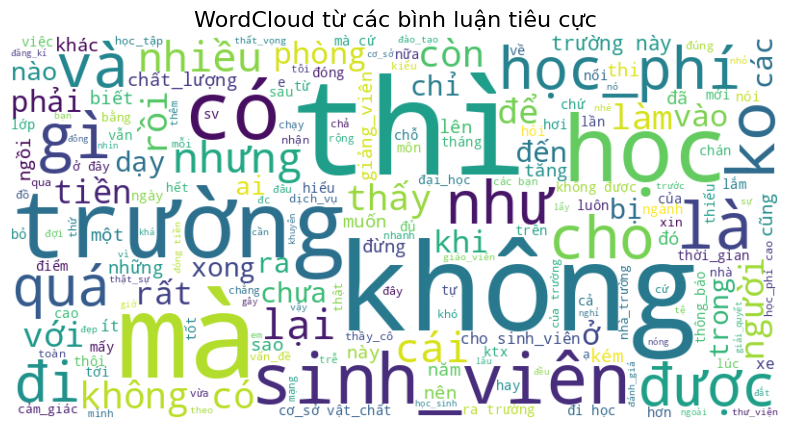

In [ ]:
negative_comment = df_1[df_1['Label'] == 0]
all_negative_tokens = " ".join([" ".join(tokens) for tokens in negative_comment['tokens']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_negative_tokens)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud từ các bình luận tiêu cực', fontsize=16)
plt.show()

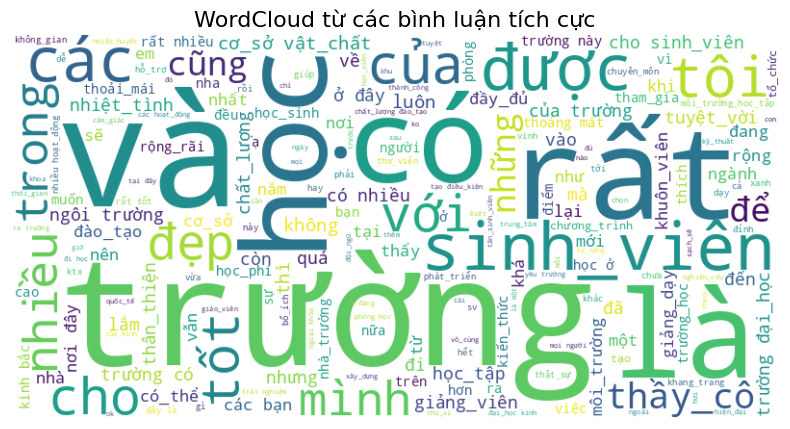

In [ ]:
positve_comment = df_1[df_1['Label'] == 1]
all_positve_tokens = " ".join([" ".join(tokens) for tokens in positve_comment['tokens']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positve_tokens)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud từ các bình luận tích cực', fontsize=16)
plt.show()